In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [2]:
from PIL import Image, ImageDraw, ImageOps

In [3]:
def circle(radius):
    # init vars
    switch = 3 - (2 * radius)
    points = []
    x = 0
    y = radius
    # first quarter/octant starts clockwise at 12 o'clock
    while x <= y:
        # first quarter first octant
        points.append([x,-y])
        # first quarter 2nd octant
        points.append([y,-x])
        # second quarter 3rd octant
        points.append([y,x])
        # second quarter 4.octant
        points.append([x,y])
        # third quarter 5.octant
        points.append([-x,y])        
        # third quarter 6.octant
        points.append([-y,x])
        # fourth quarter 7.octant
        points.append([-y,-x])
        # fourth quarter 8.octant
        points.append([-x,-y])
        if switch < 0:
            switch = switch + (4 * x) + 6
        else:
            switch = switch + (4 * (x - y)) + 10
            y = y - 1
        x = x + 1
    return points

In [23]:
def pre_cHash(image, size = 256):
    image = image.resize((size, size), Image.LANCZOS)
    image = image.convert("RGB")
    array = np.asarray(image)
    array.flags.writeable = True
    
    #指定したサイズのBresenham中実円の座標を得る
    radius = len(array)//2 #radius = image//2
    p = []
    for i in range(radius): 
        p.append(circle(i)) #画像の中心を(0,0)とした座標を得る

    
    #重複を消して座標を左上を(0,0)に合わせる
    coords = []
    for i in range(len(p)):
        coords.append(np.asarray(list(map(list, set(map(tuple, p[i])))))-radius)

    a = []
    for i in range(8):
        temp = []
        pad_width = (0, len(max(coords, key=len))-len(coords[i]))
        for j in range(len(coords[i])):
            x, y = zip(coords[i][j])
            array[x,y] = [255,0,0]

    return array

In [5]:
lena = Image.open(r'data/DWT_lenna.png')
a = pre_cHash(lena)

In [6]:
lena_left = Image.open(r'data/lena_left.png')
b =  pre_cHash(lena_left)

In [7]:
barbara = Image.open(r'data/Barbara.jpg')
c =  pre_cHash(barbara)

In [24]:
lenna2 = Image.open('./data/DWT_lenna2.jpg')
d = pre_cHash(lenna2)

In [9]:
lenna_DWT = Image.open('./data/DWT_lenna1.jpg')
e = pre_cHash(lenna_DWT)

In [10]:
mandrill = Image.open('./data/color/Mandrill.bmp')
f = pre_cHash(mandrill)

In [11]:
lena_mirror = Image.open('./data/lenna_mirror.jpg')
g = pre_cHash(lena_mirror)

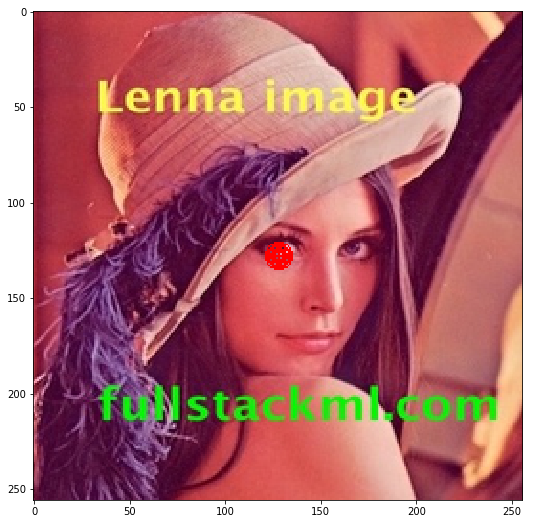

In [25]:
plt.figure(figsize=(12, 9))
plt.imshow(d)

In [26]:
Image.fromarray(d).save('lenna2_center.png')